<a href="https://colab.research.google.com/github/AikenChung/microBE/blob/main/phyla_dataset_CLR_heatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
colab = True
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%load_ext rpy2.ipython
#===============================================================================
# HeapMap visualization for spotting the batch effects of Phyla dataset
# Team: microBE
# @Ali, @Anthony, @Laura, @Aiken
#===============================================================================


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
#!sudo apt install libgsl-dev
#!pip install rpy2
#%reload_ext rpy2.ipython

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgsl23 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  libgsl-dev libgsl23 libgslcblas0
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 1,926 kB of archives.
After this operation, 9,474 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgslcblas0 amd64 2.4+dfsg-6 [79.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgsl23 amd64 2.4+dfsg-6 [823 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgsl-dev amd64 2.4+dfsg-6 [1,023 kB]
Fetched 1,926 kB in 1s (1,620 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5

In [ ]:
%%R
#install.packages("googledrive")
#library("googledrive")
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("mixOmics")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/BiocManager_1.30.10.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 40205 bytes (39 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

Update all/some/none? [a/s/n]: a


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/desc_1.3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 292882 bytes (286 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

In [ ]:
%%R
install.packages("pheatmap")
library(mixOmics) # for CLR
library(pheatmap) # for heatmap

# Prepare input data and get data ready
phyla_dataset_d3 <- read.csv("/file_Path_To/phyla_dataset_d3.csv",
                             row.names=1,
                             header=T,
                             check.names=FALSE)
phyla.count <- data.matrix(phyla_dataset_d3[,1:1177], rownames.force = NA)
phyla.metadata <- phyla_dataset_d3[,1178:1183]


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pheatmap_1.0.12.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 15071 bytes (14 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [ ]:
%%R
#************************** Setting Parameters *********************************#
# Set parameters
# The threshold 0.01 denotes the frequency of 0.01 %
# frequency_filtering_threshold <- 0.01 # Frequency is a bit of indirect! Using the count number.
totalCount_threshold <- 5
# Color codes for heatmap visualization
batch_color_col_site <- c('OSCCAR' = 'lightsalmon2', 
                          'PRISM' = 'blue',
                          'RISK' = 'yellow', 
                          'MGH' = 'lightslateblue',
                          'Cedars-Sinai' = 'limegreen', 
                          'Cincinnati' = 'magenta2',
                          'MGH Pediatrics' = 'mediumorchid4', 
                          'BOULDER' = 'navajowhite2',
                          'North Carolina' = 'olivedrab', 
                          'CVDF' = 'red',
                          'paneth_cells' = 'green1', 
                          'PRJNA436359' = 'darkturquoise',
                          'AG' = 'darkgreen')
batch_color_stool_biopsy <- c('stool' = 'darkgrey', 'biopsy' = 'darkred')
batch_color_studyID <- c('GEVERSM' = 'yellow', 
                         'HMP' = 'lightslateblue',
                         'GEVERSC' = 'limegreen', 
                         'QIITA550' = 'magenta2',
                         'QIITA2202' = 'mediumorchid4', 
                         'CVDF' = 'navajowhite2',
                         'MUC' = 'olivedrab', 
                         'PRJNA436359' = 'red',
                         'AG' = 'green1')
group_color_uc_cd <- c('Control' = 'springgreen', 
                       'CD' = 'dodgerblue3', 
                       'UC' = 'deeppink')
# Set color code
batch_color_setting <- batch_color_col_site # or batch_color_stool_biopsy, batch_color_studyID 
group_color_setting <- group_color_uc_cd # or batch_color_col_site, batch_color_stool_biopsy, batch_color_studyID 
# Set batch effect variable and the observing group
batch_effect_variable <- phyla.metadata$col_site # $uc_cd, $studyID, $col_site, $stool_biopsy
observing_group <- phyla.metadata$uc_cd  # $uc_cd, $studyID, $col_site, $stool_biopsy
# Set title for heatmap graph
rawCount_heatMapt_Title <- 'Phyla dataset - Raw Count'
normalized_heatMapt_Title <- 'Phyla dataset - Normalized'

#*************************** End of Setting Parameters **************************#

In [ ]:
%%R
# Extract batch effect variables and observing group as factors
phyla.batch <- as.factor(batch_effect_variable)
names(phyla.batch) <- row.names(phyla.metadata)
phyla.group <- as.factor(observing_group)
names(phyla.group) <- row.names(phyla.metadata)

# Prefiltering basing on the frequency of the genus
#phyla.index.keep <- which(colSums(phyla.count)*100/(sum(colSums(phyla.count))) > frequency_filtering_threshold)
phyla.index.keep <- which((colSums(phyla.count)) > totalCount_threshold)
phyla.count.keep.ori <- phyla.count[, phyla.index.keep]
# Re-organize the genus name (because it's too long to visualize)
extracted_new_colName <- colnames(phyla.count.keep.ori)
i<-1
for (name in extracted_new_colName){
  name_list <- list()
  name_list <- strsplit(name, ";", fixed = TRUE)
  firstName = name_list[[1]][1]
  lastName = ""
  name_list_Rev <- rev(name_list[[1]])
  for(elementName in name_list_Rev){
     if(elementName != "__" &  nchar(elementName)>9){
       lastName <- elementName
       break;
     }
  }
  new_colName <-paste(firstName, lastName, sep = ";", collapse = NULL)
  extracted_new_colName[i] <- new_colName
  i <- i+1
}
phyla.count.keep <- phyla.count.keep.ori
colnames(phyla.count.keep) <- extracted_new_colName
dim(phyla.count.keep)

# Adding offset to filtered raw count data
phyla.count.keep <- phyla.count.keep + 1

# Centered log-ratio transformation
phyla.clr <- logratio.transfo(phyla.count.keep, logratio = 'CLR')
class(phyla.clr) <- 'matrix'


In [ ]:
%%R
# For Batch Effect detection
# Function to draw Heatmap
drawHeatMap <- function(inputData, annoCol, annoMetaColor, titleText){
  pheatmap(inputData, 
           scale = 'none', 
           cluster_rows = F, 
           cluster_cols = T, 
           fontsize_row = 4, fontsize_col = 6,
           fontsize = 8,
           clustering_distance_rows = 'euclidean',
           clustering_method = 'ward.D',
           treeheight_row = 30,
           annotation_col = annoCol,
           annotation_colors = annoMetaColor,
           border_color = 'NA',
           main = titleText)
}

In [ ]:
%%R
# Filtered Raw Count Data for drawHeatMap function
phyla.count.keep.scale <- scale(phyla.count.keep,center = T, scale = T)
phyla.count.keep.scale <- scale(t(phyla.count.keep.scale), center = T, scale = T)
# Filtered Normalized Data for drawHeatMap function
phyla.clr.scale <- scale(phyla.clr,center = T, scale = T)
phyla.clr.scale <- scale(t(phyla.clr.scale), center = T, scale = T)
# Set attributes for drawHeatMap function
phyla.anno_col <- data.frame(Batch = phyla.batch, Group = phyla.group)
phyla.anno_metabo_colors <- list(Batch = batch_color_setting, 
                                 Group = group_color_setting)


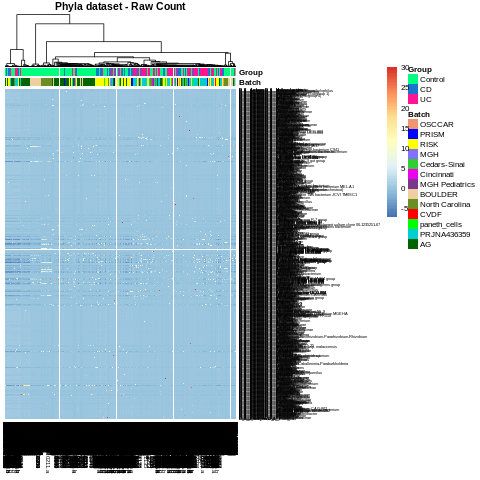

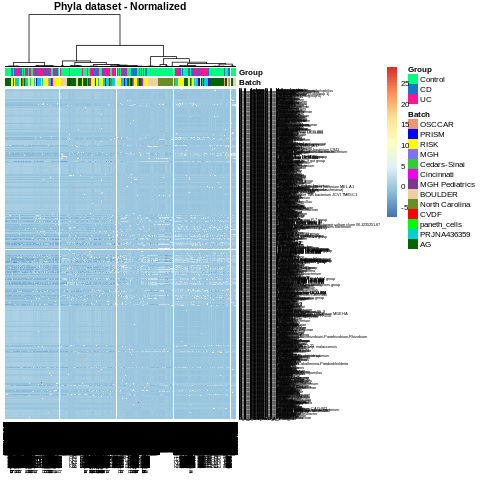

In [ ]:
%%R
# Darw the heatmap for Filtered Raw Count Data
drawHeatMap(phyla.count.keep.scale, phyla.anno_col,phyla.anno_metabo_colors,rawCount_heatMapt_Title)
# Darw the heatmap for Filtered Normalized Data
drawHeatMap(phyla.clr.scale, phyla.anno_col,phyla.anno_metabo_colors,normalized_heatMapt_Title)